<a href="https://colab.research.google.com/github/mkg6573/Linear-Regression-from-scratch/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This cell imports the fundamental libraries for data manipulation (`numpy` and `pandas`) and plotting (`matplotlib.pyplot`). These are essential for most data science tasks.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

This cell loads the dataset from a CSV file named `after_EDA_dataset.csv` into a pandas DataFrame called `df`. Please ensure the file path is correct and accessible.

In [ ]:
df = pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\DS\ML\L R\after_EDA_dataset.csv")

In [ ]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


This cell defines a custom Python class `MeraLinearRegression`. It implements a linear regression model from scratch, including methods for data standardization, fitting the model with gradient descent, and making predictions. It also tracks the mean squared error (MSE) loss during training.

In [ ]:
class MeraLinearRegression:
    def __init__(self,lr=0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.corf_ = None
        self.intercept_ = None
        self.mean_ = None
        self.std_ = None
        self.columns_ = None
        self.losses_ = []


    # Apply standardization formula
    def _standardScale(self,X,fit=False):
        if fit:
            self.mean_ = X.mean()
            self.std_ = X.std().replace(0,1)

        return (X-self.mean_)/self.std_

    # fit method
    def fit(self,X_train,y_train):
        # Convert categorical features into numerical using one-hot encoding
        X_train = pd.get_dummies(X_train,drop_first=True).astype(int)
        self.columns_ = X_train.columns

        X_train = self._standardScale(X_train,fit=True)

        # Convert DataFrame to NumPy array for fast computation
        X_train = X_train.values
        y_train = y_train.values

        # finding row and column
        row,col = X_train.shape

        self.corf_ = np.zeros(col)
        self.intercept_ = 0
        self.losses_ = []

        for i in range(self.epochs):
            y_pred = np.dot(X_train,self.corf_) + self.intercept_

            dw = (1/row) * np.dot(X_train.T,(y_pred - y_train))
            db = (1/row) * np.sum(y_pred - y_train)

            self.corf_ -= self.lr * dw
            self.intercept_ -= self.lr * db
            #print("epochs ",i,"coeff :",self.corf_ ,"  ","intercet :",self.intercept_)

            #LOSS (MSE)
            loss = (1 / row) * np.sum((y_pred - y_train) ** 2)
            self.losses_.append(loss)


    #predict method
    def predict(self,X_test):
        X_test = pd.get_dummies(X_test,drop_first=True).astype(int)

        X_test = X_test.reindex(columns=self.columns_,fill_value=0)

        X_test = self._standardScale(X_test,fit=False)

        X_test = X_test.values
        return np.dot(X_test,self.corf_) + self.intercept_

This cell separates the features (`X`) from the target variable (`y`). The 'price' column is designated as the target (`y`), and all other columns become the features (`X`) used for prediction.

In [ ]:
X = df.drop(['price'],axis=1)
y = df['price']

This cell uses `train_test_split` to divide the dataset into training and testing sets. 80% of the data is used for training (`X_train`, `y_train`) and 20% for testing (`X_test`, `y_test`), with `random_state=42` ensuring reproducibility.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

An instance of the custom `MeraLinearRegression` class is created and assigned to the variable `LR1`. This initializes a new linear regression model with default parameters.

In [ ]:
LR1 = MeraLinearRegression()

The `fit()` method of the `LR1` model is called with the training data (`X_train`, `y_train`). This step trains the linear regression model by adjusting its coefficients and intercept to minimize the prediction error.

In [ ]:
LR1.fit(X_train,y_train)

The trained `LR1` model is used to make predictions on the `X_test` dataset. The predicted 'price' values are stored in the `y_pred` variable.

In [ ]:
y_pred = LR1.predict(X_test)

This cell evaluates the performance of the `LR1` model using standard regression metrics: R-squared (R2 Score), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). These metrics compare the `y_pred` values against the actual `y_test` values.

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7864824952391161
MAE: 7455.346718740932
RMSE: 10574.321685539928


This cell generates a line plot visualizing the training loss (Mean Squared Error) over each epoch. It helps in understanding if the model converged during training and how the error decreased over time.

Text(0.5, 1.0, 'Training Loss vs Epochs')

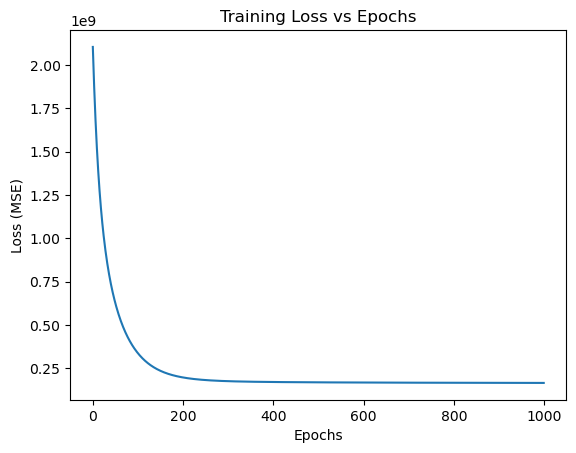

In [ ]:
length = len(LR1.losses_)
plt.plot(range(length), LR1.losses_)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")

The training loss follows an exponential decay curve, indicating stable convergence of the model

Thiscell marks the beginning of an experiment where a logarithmic transformation (`log1p`) will be applied to the target variable (`y`). This is often done to handle skewed distributions and improve model performance.

The `LR1` model is re-trained in this cell, but this time the `y_train` data is transformed using `np.log1p()` (log(1+x)). This applies a logarithmic scaling to the target variable before feeding it to the model.

In [ ]:
LR1.fit(X_train,np.log1p(y_train))

In [ ]:
y_pred = LR1.predict(X_test)

This cell applies the inverse transformation, `np.expm1()` (e^x - 1), to the log-transformed predictions (`y_pred`). This converts the predictions back to the original scale of the 'price' variable for meaningful interpretation.

In [ ]:
y_pred = np.expm1(y_pred)

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.837236604918896
MAE: 5077.442108649593
RMSE: 9232.390075582061


Text(0.5, 1.0, 'Training Loss vs Epochs')

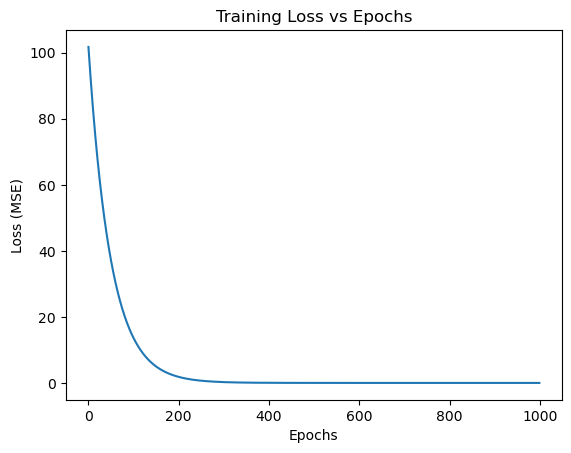

In [ ]:
length = len(LR1.losses_)
plt.plot(range(length), LR1.losses_)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")

##  Side-by-side comparison

| Metric       | Old    | New        |
| ------------ | ------ | ---------- |
| **R² Score** | 0.7865 | **0.8372** |
| **MAE**      | 7455   | **5077**   |
| **RMSE**     | 10574  | **9232**   |

In this cell, the feature set `X` is redefined by dropping additional columns ('fast_charge', 'is_ir_blaster', 'charging_speed') that might not be contributing positively to the model, suggesting further feature engineering or selection. The target `y` remains 'price'.

In [ ]:
X = df.drop(['price','fast_charge','is_ir_blaster','charging_speed'],axis=1)
y = df['price']

In [ ]:
lr = MeraLinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7864824952391161
MAE: 7455.346718740932
RMSE: 10574.321685539928


log transform on output

In [ ]:
LR = MeraLinearRegression(epochs=2000)

In [ ]:
LR.fit(X_train,np.log1p(y_train))

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
y_pred = np.expm1(y_pred)

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8415908671645327
MAE: 4963.064682144864
RMSE: 9108.060015597708


Text(0.5, 1.0, 'Training Loss vs Epochs')

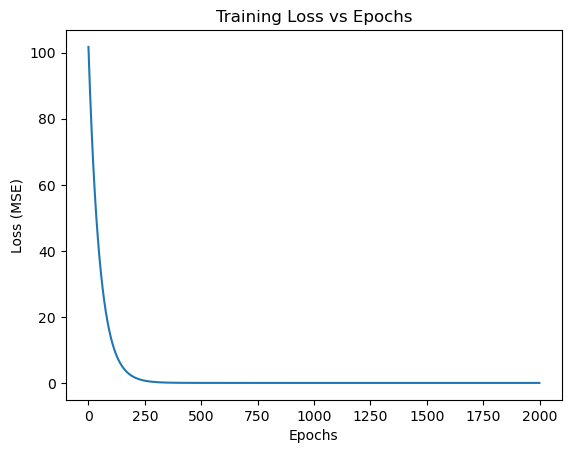

In [ ]:
length = len(LR.losses_)
plt.plot(range(length), LR.losses_)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")

This markdown cell introduces the next section, indicating a shift from the custom `MeraLinearRegression` model to using scikit-learn's built-in `LinearRegression` model for comparison.

This cell imports the necessary components from `sklearn` for building a robust machine learning pipeline: `OneHotEncoder` and `StandardScaler` for preprocessing, `ColumnTransformer` for applying different transformations to different columns, `Pipeline` for streamlining the workflow, and `LinearRegression` for the model itself.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
cat_cols = ['brand', 'processor_brand', 'os']

In [ ]:
num_cols = [
    'reting','is_5g','core','is_nfc',
    'proccessor_speed','ram','internal_memory',
    'rear_mp','front_mp','battery_size','display_size','refresh_rate'
]

In [ ]:
processor  = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols),
        ('cat',OneHotEncoder(drop='first'),cat_cols)
    ]
)

In [ ]:
model1 = Pipeline(
    steps=[
        ('processor',processor),
        ('model',LinearRegression())
    ]
)

This cell uses the trained `model1` pipeline to make predictions on the `X_test` data. The predictions (`y_log_pred`) will be in the logarithmic scale.

In [ ]:
model1.fit(X_train,np.log1p(y_train))

,steps,"[('processor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_log_pred = model1.predict(X_test)

In [ ]:
y_pred = np.expm1(y_log_pred)

In [ ]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8413744901456246
MAE: 4932.350036065437
RMSE: 9114.278414465318
